In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from analysis import *
import glob
import re
import hvplot.xarray
font = {'family':'serif',
        'weight': 'normal',
        'size': 32}
plt.rc('font',**font)
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#000000','#e3130f','#0962f6',
                                                    '#20c168','#fc76f3','#2efef4'])
plt.rc('text',usetex=True)

In [5]:
def find_meff(f):
    z = re.compile('.*Meff(?P<m>\d+\.\d+).*')
    return float(re.match(z,f)['m'])
def read_file(f):
    return xr.open_dataset(f)
op = combine_new_dim({find_meff(f):read_file(f) for f in glob.glob('./*op.nc')}, 'meff').sortby('meff')
xport = combine_new_dim({find_meff(f):read_file(f) for f in glob.glob('./*xport.nc')}, 'meff').sortby('meff')
op_xi = combine_new_dim({find_meff(f):read_file(f) for f in glob.glob('./*op_xi.nc')}, 'meff').sortby('meff')
xport_xi = combine_new_dim({find_meff(f):read_file(f) for f in glob.glob('./*xport_xi.nc')}, 'meff').sortby('meff')

op_pd = combine_new_dim({find_meff(f):read_file(f) 
                         for f in glob.glob('../../2021-5-17-ThowPdCo/all_devs/*op.nc')}, 'meff').sortby('meff')
xport_pd = combine_new_dim({find_meff(f):read_file(f) 
                         for f in glob.glob('../../2021-5-17-ThowPdCo/all_devs/*xport.nc')}, 'meff').sortby('meff')
ts = np.array([1.24,1.15,1.07,1.00,0.93,0.86])
ts_pd = np.array([0.65,0.6,0.55])

Text(0, 0.5, '$\\mu_0|\\Delta H_X|/J_e$')

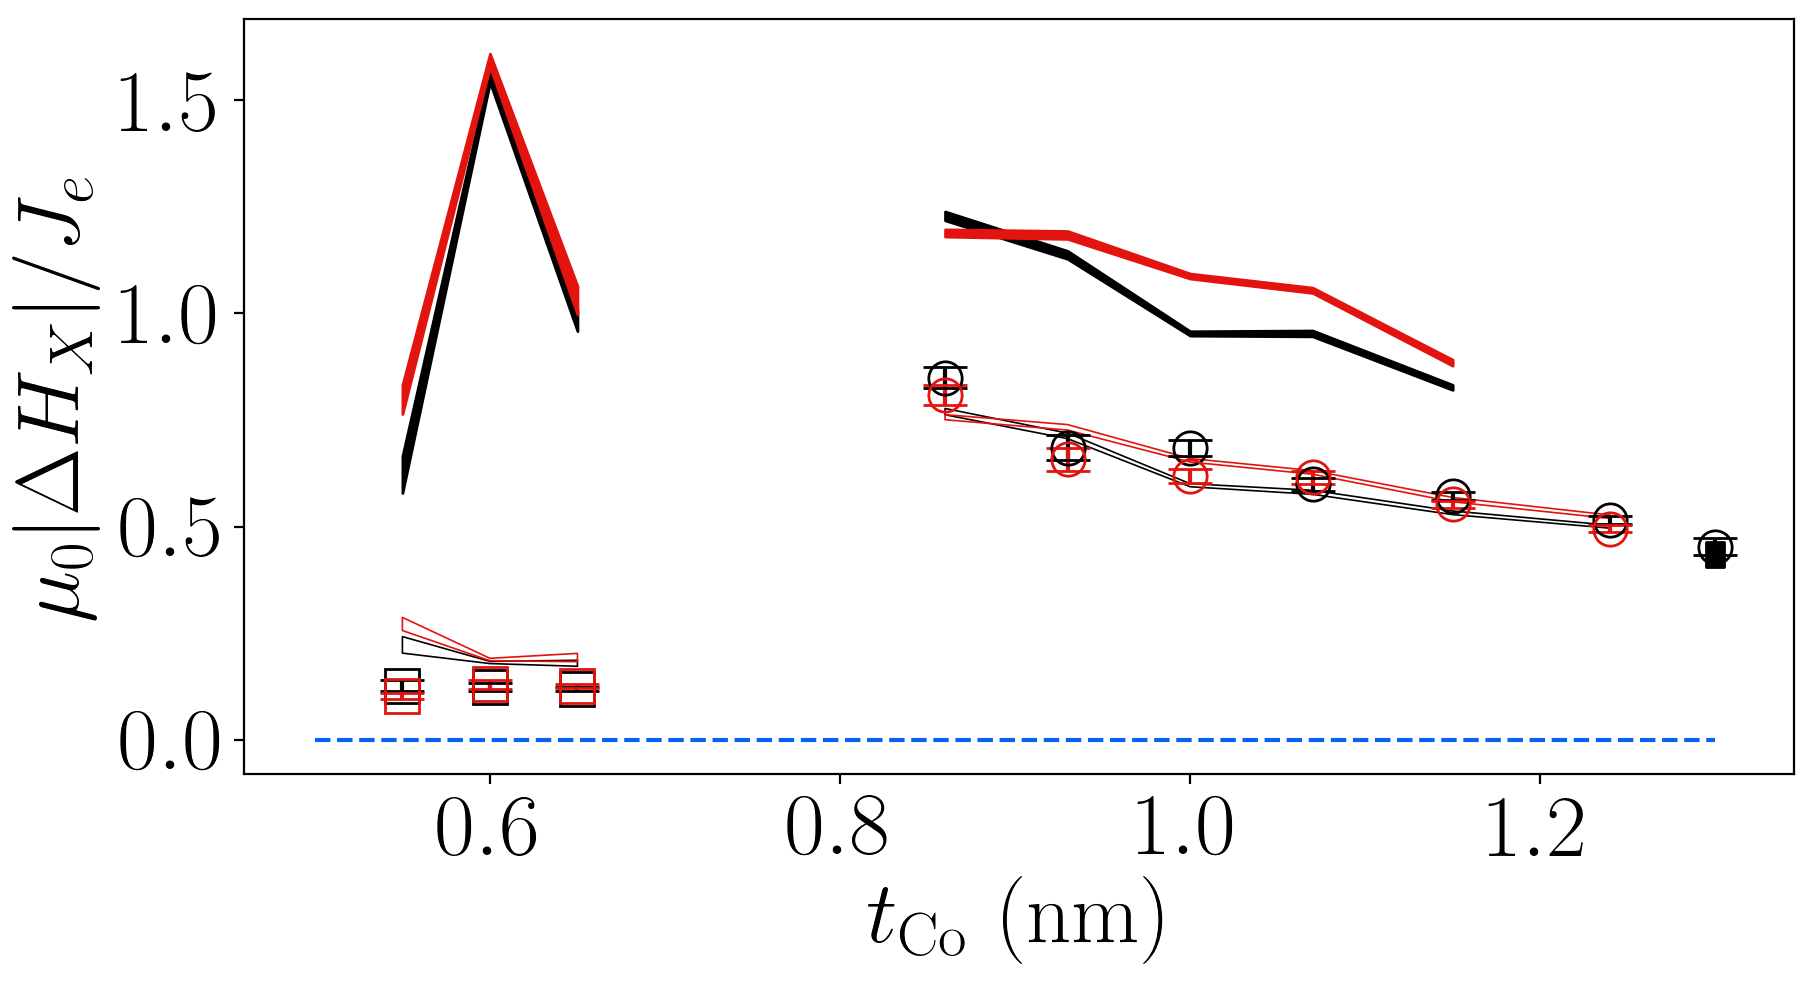

In [6]:
thick_meff = 0.05
thick_t = 1.3
xport_thick_m = 0.435
xport_thick_m_err = 0.03
optics_thick_m = 0.453
optics_thick_m_err = 0.02
indices = [0]+list(range(2,7))

plt.figure(figsize=(10,5),dpi=200)

plt.fill_between(ts,
                 (xport.sel(field_azimuth=90,M=1,PHC='noPHC').m*1e6/10 + \
                 2*xport.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*1e6/10),
                 (xport.sel(field_azimuth=90,M=1,PHC='noPHC').m*1e6/10 - \
                 2*xport.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*1e6/10),
                 label='$\\epsilon=0$; M+',facecolor="none", edgecolor='C0',
                 linewidth=0.6, alpha = 1)
plt.fill_between(ts,
                 -(xport.sel(field_azimuth=90,M=-1,PHC='noPHC').m*1e6/10 + \
                 2*xport.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*1e6/10),
                 -(xport.sel(field_azimuth=90,M=-1,PHC='noPHC').m*1e6/10 - \
                 2*xport.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*1e6/10),
                 label='$\\epsilon=0$; M$-$',facecolor="none", edgecolor='C1',
                 linewidth=0.6, alpha = 1)
plt.fill_between(ts,
                 (xport.sel(field_azimuth=90,M=1,PHC='PHC').m*1e6/10 + \
                 2*xport.sel(field_azimuth=90,M=1,PHC='PHC').m_err*1e6/10),
                 (xport.sel(field_azimuth=90,M=1,PHC='PHC').m*1e6/10 - \
                 2*xport.sel(field_azimuth=90,M=1,PHC='PHC').m_err*1e6/10),
                 color = 'C0', alpha = 1,label='M+')
plt.fill_between([1.295,1.305],
                 [xport_thick_m + xport_thick_m_err , xport_thick_m + xport_thick_m_err],
                 [xport_thick_m - xport_thick_m_err , xport_thick_m - xport_thick_m_err],
                 color = 'C0', alpha = 1,label='M+')
plt.fill_between(ts,
                 -(xport.sel(field_azimuth=90,M=-1,PHC='PHC').m*1e6/10 + \
                 2*xport.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*1e6/10),
                 -(xport.sel(field_azimuth=90,M=-1,PHC='PHC').m*1e6/10 - \
                 2*xport.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*1e6/10),
                 color = 'C1', alpha = 1,label='M$-$')

#--Pd
plt.fill_between(ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m*1e6/10 + \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*1e6/10),
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m*1e6/10 - \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*1e6/10),
                 facecolor="none", edgecolor='C0',
                 linewidth=0.6,alpha=1)
plt.fill_between(ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m*1e6/10 + \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*1e6/10),
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m*1e6/10 - \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*1e6/10),
                 facecolor="none", edgecolor='C1',
                 linewidth=0.6,alpha=1)
plt.fill_between(ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m*1e6/10 + \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m_err*1e6/10),
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m*1e6/10 - \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m_err*1e6/10),
                 color = 'C0', alpha = 1)
plt.fill_between(ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m*1e6/10 + \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*1e6/10),
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m*1e6/10 - \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*1e6/10),
                 color = 'C1', alpha = 1)


plt.errorbar(np.append(thick_t,ts),np.append(optics_thick_m, op.sel(field_azimuth=90,M=1).m*1e6/10),
                 np.append(optics_thick_m_err, op.sel(field_azimuth=90,M=1).m_err*1e6/10),
                 fmt='o',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C0',
                 label='Pt M+')
plt.errorbar(ts,-op.sel(field_azimuth=90,M=-1).m*1e6/10,
                 op.sel(field_azimuth=90,M=-1).m_err*1e6/10,
                 fmt='o',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C1',
                 label='Pt M$-$')

plt.errorbar(ts_pd,op_pd.sel(field_azimuth=90,M=1).m*1e6/10,
                 op_pd.sel(field_azimuth=90,M=1).m_err*1e6/10,
                 fmt='s',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C0',
                 label='Pd M+')
plt.errorbar(ts_pd,-op_pd.sel(field_azimuth=90,M=-1).m*1e6/10,
                 op_pd.sel(field_azimuth=90,M=-1).m_err*1e6/10,
                 fmt='s',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C1',
                 label='Pd M$-$')


plt.plot([0.5,1.3],[0,0],'C2',ls='--')
plt.xlabel('$t_{\\rm{Co}}$ (nm)')
# plt.ylabel('$\\mu_0 |\\Delta H_X|/J_e$ ($\\times 10^{-6}$ mT/(A/cm$^2))$')
plt.ylabel('$\\mu_0|\\Delta H_X|/J_e$')

# plt.xticks([0,0.5,1,])
# plt.legend(loc='lower left',bbox_to_anchor=(0,1),ncol=4,frameon=False,
#            columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)
# plt.text(0.87,3.7,'HH',fontsize=22)
# plt.text(1.15,3.7,'Sagnac',fontsize=22)

Text(0, 0.5, '$\\mu_0 \\Delta H_Y/J_e$')

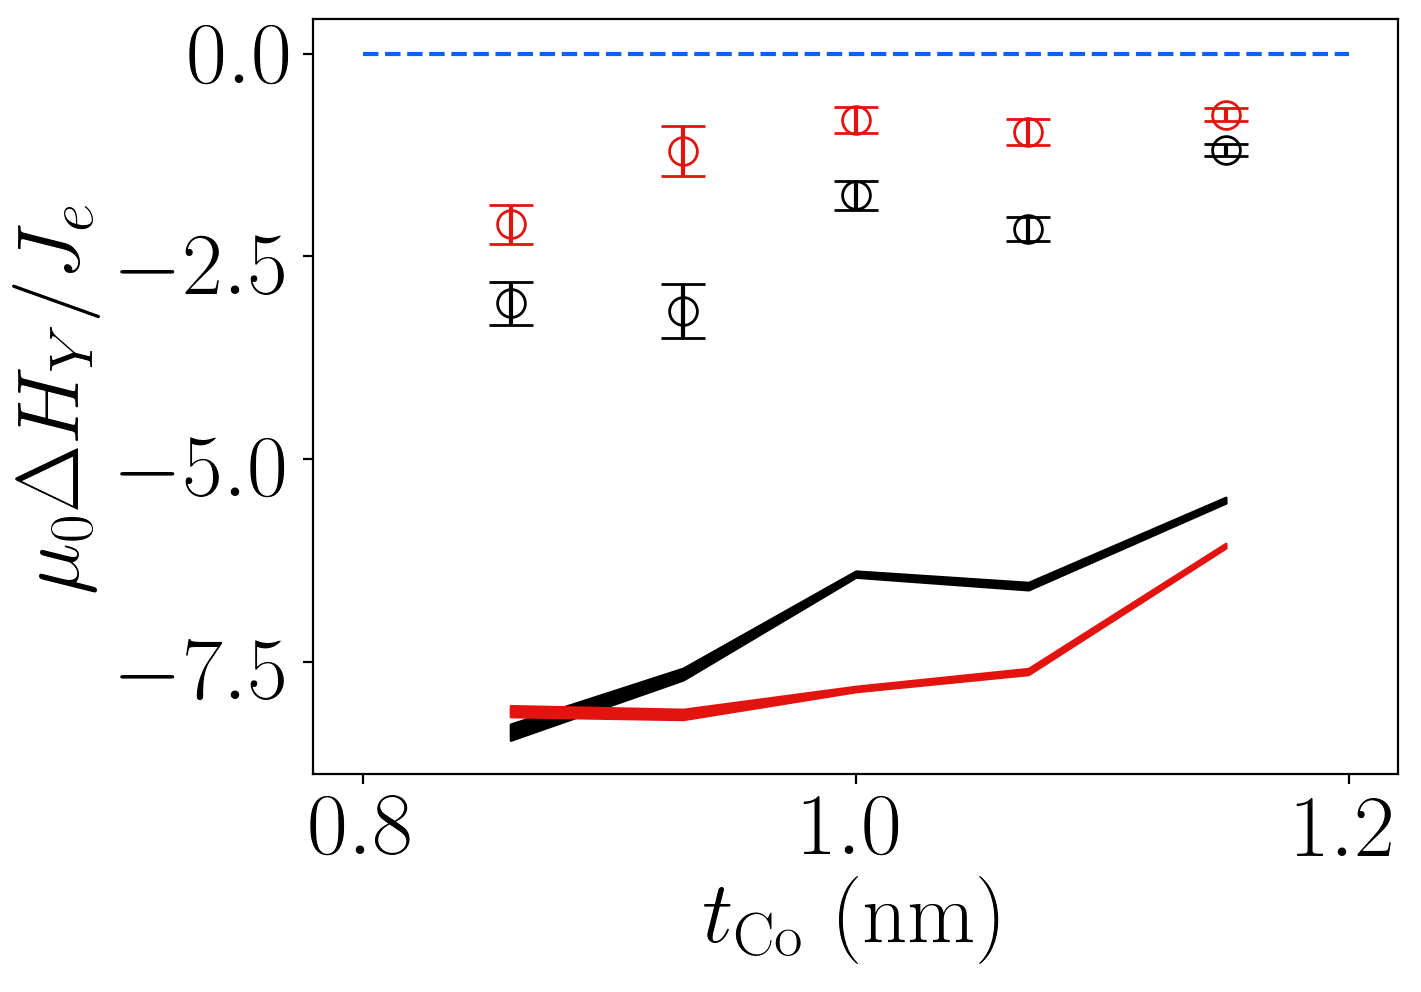

In [7]:
plt.figure(figsize=(7,5),dpi=200)

plt.fill_between(ts,
                 -(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m*1e6+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err*1e6),
                 -(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m*1e6- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err*1e6),
                 label='no PHC; M+',facecolor="none", edgecolor='C0',
                 linewidth=0.6,alpha=0)
plt.fill_between(ts,
                 -(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m*1e6+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err*1e6),
                 -(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m*1e6- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err*1e6),
                 label='no PHC; M$-$',facecolor="none", edgecolor='C1',
                 linewidth=0.6,alpha=0)


plt.fill_between(ts,
                 -(xport.sel(field_azimuth=0,M=1,PHC='PHC').m*1e6+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err*1e6),
                 -(xport.sel(field_azimuth=0,M=1,PHC='PHC').m*1e6- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err*1e6),
                 color = 'C0',alpha=1,label='PHC; M+')
plt.fill_between(ts,
                 -(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m*1e6+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err*1e6),
                 -(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m*1e6- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err*1e6),
                 color = 'C1',alpha=1,label='PHC; M$-$')


plt.errorbar(ts,op.sel(field_azimuth=0,M=1).m*1e6,
                 op.sel(field_azimuth=0,M=1).m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='DL; M+')
plt.errorbar(ts,op.sel(field_azimuth=0,M=-1).m*1e6,
                 op.sel(field_azimuth=0,M=-1).m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='DL; M$-$')

plt.plot([0.8,1.2],[0,0],'C2',ls='--')
plt.xlabel('$t_{\\rm{Co}}$ (nm)')
# plt.ylabel('$\\Delta H_Y/J_e$ ($\\times 10^{-6}$ Oe/(A/cm$^2))$')
plt.ylabel('$\\mu_0 \\Delta H_Y/J_e$')

# plt.xticks([0,0.5,1,])

# plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.95),ncol=3,frameon=False,
#            columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)
# plt.text(0.52,0.155,'Transport',fontsize=22)
# plt.text(0.87,0.155,'Optics',fontsize=22)

Text(0, 0.5, '$\\xi_{\\rm{DL}}$')

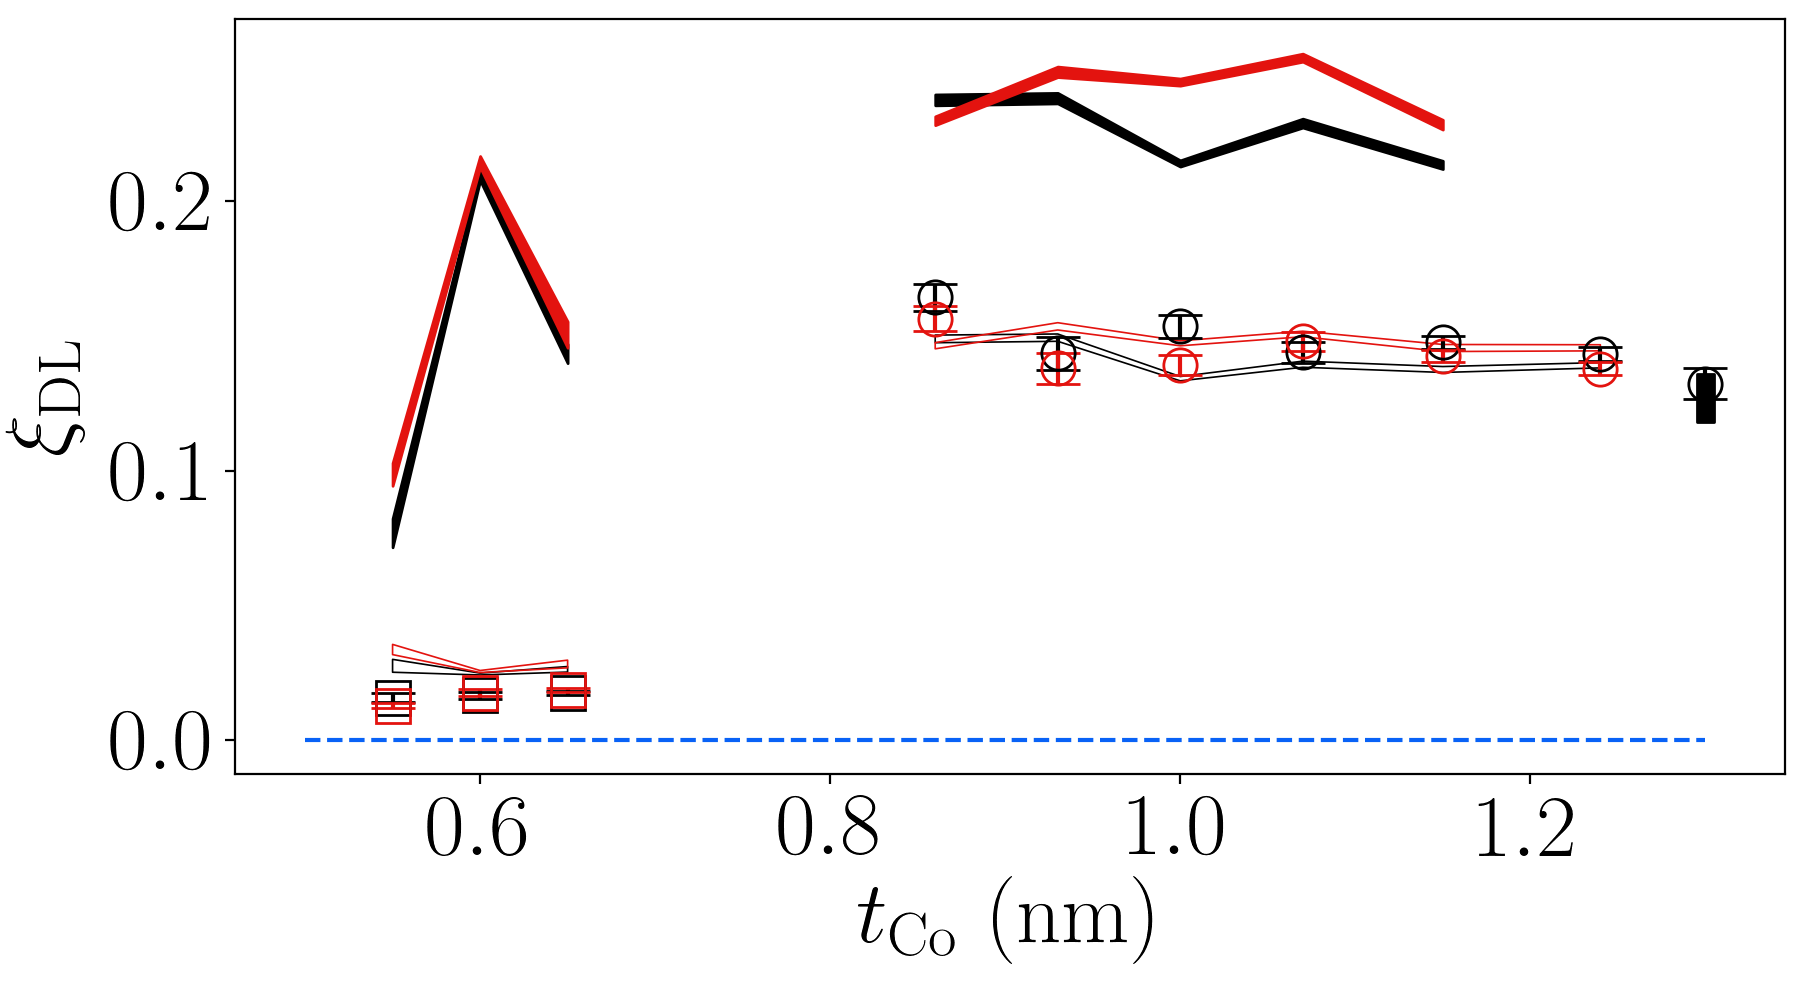

In [8]:

thick_meff = 0.05
thick_t = 1.3
t2xi = 2*1.6e-19*0.93/(4*np.pi*1e-7)*thick_t*1e-9/1.055e-34/1e13
xport_thick_m = 0.435*t2xi
xport_thick_m_err = 0.03*t2xi
optics_thick_m = 0.453*t2xi
optics_thick_m_err = 0.02*t2xi
indices = [0]+list(range(2,7))
appa = 2*1.6e-19*0.93/(4*np.pi*1e-7)*1e-9/1.055e-34/1e13

plt.figure(figsize=(10,5),dpi=200)

plt.fill_between(ts,
                 (xport_xi.sel(field_azimuth=90,M=1,PHC='noPHC').m + \
                 2*xport_xi.sel(field_azimuth=90,M=1,PHC='noPHC').m_err),
                 (xport_xi.sel(field_azimuth=90,M=1,PHC='noPHC').m - \
                 2*xport_xi.sel(field_azimuth=90,M=1,PHC='noPHC').m_err),
                 label='$\\epsilon=0$; M+',facecolor="none", edgecolor='C0',
                 linewidth=0.6, alpha=1)
plt.fill_between(ts,
                 -(xport_xi.sel(field_azimuth=90,M=-1,PHC='noPHC').m + \
                 2*xport_xi.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err),
                 -(xport_xi.sel(field_azimuth=90,M=-1,PHC='noPHC').m - \
                 2*xport_xi.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err),
                 label='$\\epsilon=0$; M$-$',facecolor="none", edgecolor='C1',
                 linewidth=0.6, alpha=1)
plt.fill_between(ts,
                 (xport_xi.sel(field_azimuth=90,M=1,PHC='PHC').m + \
                 2*xport_xi.sel(field_azimuth=90,M=1,PHC='PHC').m_err),
                 (xport_xi.sel(field_azimuth=90,M=1,PHC='PHC').m - \
                 2*xport_xi.sel(field_azimuth=90,M=1,PHC='PHC').m_err),
                 color = 'C0', alpha=1,label='M+')
plt.fill_between([1.295,1.305],
                 [xport_thick_m + xport_thick_m_err , xport_thick_m + xport_thick_m_err],
                 [xport_thick_m - xport_thick_m_err , xport_thick_m - xport_thick_m_err],
                 color = 'C0', alpha=1,label='M+')
plt.fill_between(ts,
                 -(xport_xi.sel(field_azimuth=90,M=-1,PHC='PHC').m + \
                 2*xport_xi.sel(field_azimuth=90,M=-1,PHC='PHC').m_err),
                 -(xport_xi.sel(field_azimuth=90,M=-1,PHC='PHC').m - \
                 2*xport_xi.sel(field_azimuth=90,M=-1,PHC='PHC').m_err),
                 color = 'C1', alpha=1,label='M$-$')

#--Pd
plt.fill_between(ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m + \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m_err)*1e5*appa*ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m - \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='noPHC').m_err)*1e5*appa*ts_pd,
                 facecolor="none", edgecolor='C0',
                 linewidth=0.6,alpha=1)
plt.fill_between(ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m + \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err)*1e5*appa*ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m - \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err)*1e5*appa*ts_pd,
                 facecolor="none", edgecolor='C1',
                 linewidth=0.6,alpha=1)
plt.fill_between(ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m + \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m_err)*1e5*appa*ts_pd,
                 (xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m - \
                 2*xport_pd.sel(field_azimuth=90,M=1,PHC='PHC').m_err)*1e5*appa*ts_pd,
                 color = 'C0', alpha=1)
plt.fill_between(ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m + \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m_err)*1e5*appa*ts_pd,
                 -(xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m - \
                 2*xport_pd.sel(field_azimuth=90,M=-1,PHC='PHC').m_err)*1e5*appa*ts_pd,
                 color = 'C1', alpha=1)


plt.errorbar(np.append(thick_t,ts),np.append(optics_thick_m, op_xi.sel(field_azimuth=90,M=1).m),
                 np.append(optics_thick_m_err, op_xi.sel(field_azimuth=90,M=1).m_err),
                 fmt='o',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C0',
                 label='Pt M+')
plt.errorbar(ts,-op_xi.sel(field_azimuth=90,M=-1).m,
                 op_xi.sel(field_azimuth=90,M=-1).m_err,
                 fmt='o',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C1',
                 label='Pt M$-$')

plt.errorbar(ts_pd,op_pd.sel(field_azimuth=90,M=1).m*1e5*appa*ts_pd,
                 op_pd.sel(field_azimuth=90,M=1).m_err*1e5*appa*ts_pd,
                 fmt='s',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C0',
                 label='Pd M+')
plt.errorbar(ts_pd,-op_pd.sel(field_azimuth=90,M=-1).m*1e5*appa*ts_pd,
                 op_pd.sel(field_azimuth=90,M=-1).m_err*1e5*appa*ts_pd,
                 fmt='s',linestyle='none',ms=12,capsize=8,fillstyle='none',color = 'C1',
                 label='Pd M$-$')


plt.plot([0.5,1.3],[0,0],'C2',ls='--')
plt.xlabel('$t_{\\rm{Co}}$ (nm)')
# plt.ylabel('$\\mu_0 |\\Delta H_X|/J_e$ ($\\times 10^{-6}$ mT/(A/cm$^2))$')
plt.ylabel('$\\xi_{\\rm{DL}}$')

# plt.xticks([0,0.5,1,])
# plt.legend(loc='lower left',bbox_to_anchor=(0,1),ncol=4,frameon=False,
#            columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)
# plt.text(0.87,3.7,'HH',fontsize=22)
# plt.text(1.15,3.7,'Sagnac',fontsize=22)

Text(0, 0.5, '$\\xi_{\\rm{FL}}$')

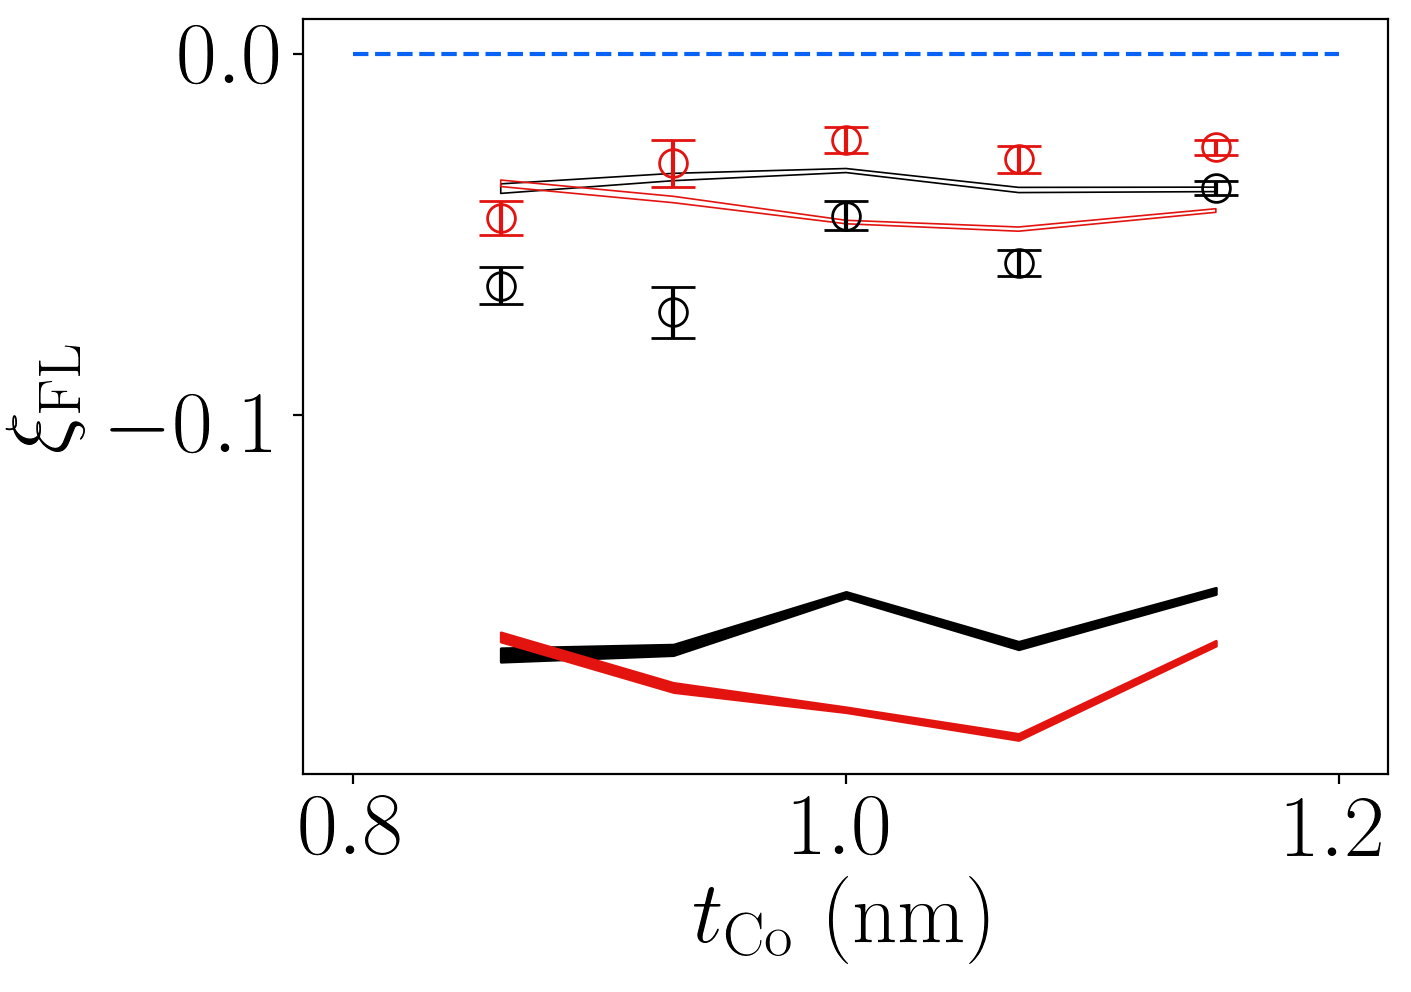

In [20]:
HOe = 4*1e-9*4*np.pi*1e-7/2
mu0 = 4*np.pi*1e-7
Ms = 0.93/mu0 # T
hbar = 1.055e-34
t2xi = 2*1.6e-19*Ms*ts*1e-9/hbar
plt.figure(dpi=200,figsize=(7,5))

plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 alpha=1,label='no PHC; M+',facecolor="none", edgecolor='C0',
                 linewidth=0.6)
plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 alpha=1,label='no PHC; M$-$',facecolor="none", edgecolor='C1',
                 linewidth=0.6)


plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='PHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='PHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 color = 'C0', alpha=1,label='PHC; M+')
plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 color = 'C1', alpha=1,label='PHC; M$-$')


plt.errorbar(ts,(op.sel(field_azimuth=0,M=1).m/1e8-HOe)*t2xi,
                 (op.sel(field_azimuth=0,M=1).m_err/1e8)*t2xi,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='DL; M+')
plt.errorbar(ts,(op.sel(field_azimuth=0,M=-1).m/1e8-HOe)*t2xi,
                 (op.sel(field_azimuth=0,M=-1).m_err/1e8)*t2xi,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='DL; M$-$')

plt.plot([0.8,1.2],[0,0],'C2',ls='--')
plt.xlabel('$t_{\\rm{Co}}$ (nm)')
# plt.ylabel('$\\Delta H_Y/J_e$ ($\\times 10^{-6}$ Oe/(A/cm$^2))$')
plt.ylabel('$\\xi_{\\rm{FL}}$')

# plt.xticks([0,0.5,1,])

# plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.95),ncol=3,frameon=False,
#            columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)
# plt.text(0.52,0.155,'Transport',fontsize=22)
# plt.text(0.87,0.155,'Optics',fontsize=22

Text(0, 0.5, '$\\xi_{\\rm{FL}}$')

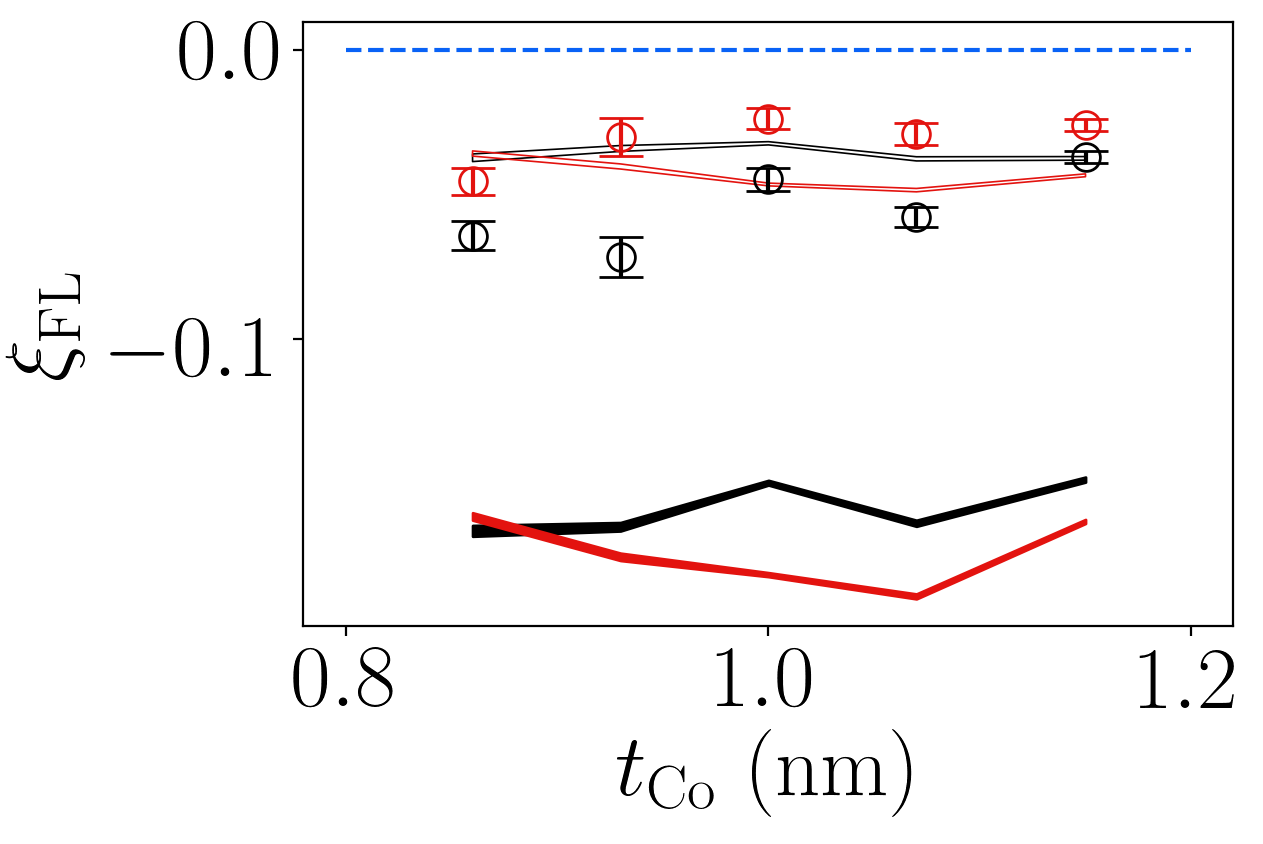

In [8]:
HOe = 4*1e-9*4*np.pi*1e-7/2
mu0 = 4*np.pi*1e-7
Ms = 0.93/mu0 # T
hbar = 1.055e-34
t2xi = 2*1.6e-19*Ms*ts*1e-9/hbar
plt.figure(dpi=200)

plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='noPHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 alpha=1,label='no PHC; M+',facecolor="none", edgecolor='C0',
                 linewidth=0.6)
plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err/1e8)-HOe)*t2xi,
                 alpha=1,label='no PHC; M$-$',facecolor="none", edgecolor='C1',
                 linewidth=0.6)


plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='PHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=1,PHC='PHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 color = 'C0', alpha = 1,label='PHC; M+')
plt.fill_between(ts,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m/1e8+ \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 (-(xport.sel(field_azimuth=0,M=-1,PHC='PHC').m/1e8- \
                 2*xport.sel(field_azimuth=0,M=-1,PHC='PHC').m_err/1e8)-HOe)*t2xi,
                 color = 'C1', alpha = 1,label='PHC; M$-$')


plt.errorbar(ts,(op.sel(field_azimuth=0,M=1).m/1e8-HOe)*t2xi,
                 (op.sel(field_azimuth=0,M=1).m_err/1e8)*t2xi,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='DL; M+')
plt.errorbar(ts,(op.sel(field_azimuth=0,M=-1).m/1e8-HOe)*t2xi,
                 (op.sel(field_azimuth=0,M=-1).m_err/1e8)*t2xi,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='DL; M$-$')

plt.plot([0.8,1.2],[0,0],'C2',ls='--')
plt.xlabel('$t_{\\rm{Co}}$ (nm)')
# plt.ylabel('$\\Delta H_Y/J_e$ ($\\times 10^{-6}$ Oe/(A/cm$^2))$')
plt.ylabel('$\\xi_{\\rm{FL}}$')

# plt.xticks([0,0.5,1,])

# plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.95),ncol=3,frameon=False,
#            columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)
# plt.text(0.52,0.155,'Transport',fontsize=22)
# plt.text(0.87,0.155,'Optics',fontsize=22)

In [ ]:
xis = {find_meff(f):np.load(f) for f in glob.glob('./*.npy')}


In [ ]:
plt.figure(dpi=200)
plt.errorbar(xis.keys(),abs(np.array(list(xis.values()))),marker='o',fillstyle='none',ms=12,linestyle='none')
plt.ylabel('$R_{\\rm{PHE}}/R_{\\rm{AHE}}$')
plt.xlabel('$\\mu_0 M_{\\rm{eff}}$ (T)')